In [370]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [371]:
data = pd.read_csv('parken_dump.csv', encoding='latin1')

In [372]:
data['Belegung'] = 100.0-data['free']/data['count']*100.0

In [373]:
ppDD = data.pivot(index='time', columns='name', values='Belegung')

# Define index and names
ppDD.index = pd.DatetimeIndex(ppDD.index)
ppDD.index.name = 'Zeit'
ppDD.columns.name = 'Parkplatz'

print('Daten von %s/%s bis %s/%s' % (ppDD.index[0].month, ppDD.index[0].year, ppDD.index[-1].month, ppDD.index[-1].year)) 

Daten von 4/2014 bis 5/2015


In [374]:
# Wir nehmen nur ein gesamtes Jahr
ppDD = ppDD['2015-02-02':'2015-03-01']

In [375]:
# format the percent without digits
ppDD = ppDD.applymap(lambda x: float('%.0f' % x))

# and limit it between 0...100%
ppDD = ppDD.applymap(lambda x: min(max(x, 0.0), 100.0))

In [376]:
centrumGalerie = ppDD[['Centrum-Galerie']].dropna()

In [377]:
hann = np.hanning(len(centrumGalerie.values))

In [378]:
centrumGalerie.values.ravel()

array([ 12.,  12.,  12., ...,  12.,  12.,  13.])

In [379]:
Y = np.fft.fft(hann*centrumGalerie.values.ravel())

In [380]:
N = len(Y)/2+1
fa = 1.0/(15.0*60.0) # every 15 minutes

In [381]:
X = np.linspace(0, fa/2, N, endpoint=True)

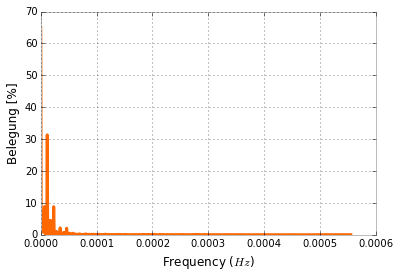

In [382]:
plt.plot(X, 2.0*np.abs(Y[:N])/N)
plt.xlabel('Frequency ($Hz$)')
plt.ylabel('Belegung [%]')

In [383]:
Xp = 1.0/X # in seconds
Xph= Xp/(60.0*60.0) # in hours

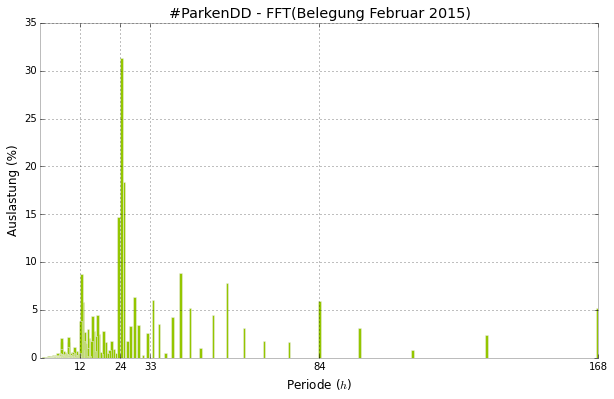

In [384]:
plt.figure(figsize=(10,6))
plt.bar(Xph, 2.0*np.abs(Y[:N])/N)
plt.xticks([12, 24, 33, 84, 168])
plt.xlim(0, 168)
#plt.ylim(0, 1500)
plt.xlabel('Periode ($h$)')
plt.ylabel('Auslastung (%)')
plt.title('#ParkenDD - FFT(Belegung Februar 2015)')
#plt.savefig('FFT-Periode.png',bbox_inches='tight', dpi=72)

* 12h day/night rythm
* 24h daily rythm
* 33.6h something? Any suggestions?
* 84.2h something? Any suggestions?
* 168h week rythm

In [385]:
Yr = Y
#Yr[N-2:N].real=0.0

In [386]:
forecast = np.fft.ifft(Yr)

(0, 100)

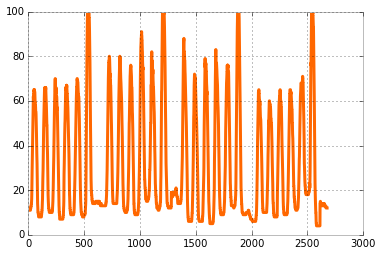

In [387]:
plt.plot(np.abs(forecast)/hann)
plt.ylim(0,100)